In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-bh-finalcsv/Customerbehavior_Final.csv
/kaggle/input/clean-ktvcsc/out.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/kaggle/input/clean-ktvcsc/out.csv', index_col=0, low_memory=False)

In [3]:
df.head()

,StoreCode,BillCode,BoxSpending,CustomerNumber,Age,Membership,UniqueID
0,107,1602010011,2857,6,30~39,0,1602010011107
10,107,1602010028,2080,4,20~29,0,1602010028107
30,107,1602010034,1300,2,30~39,0,1602010034107
39,107,1602010037,2133,5,20~29,0,1602010037107
46,107,1602010040,1161,7,20~29,0,1602010040107


In [4]:
#we have 8 storecodes for some reason
#remove '0107' and '0114'
df = df[df['StoreCode'] != '0107']
df = df[df['StoreCode'] != '0114']

#use a function to map StoreCodes to storenames
#instead of directly creating a list to show the mapping more clearly
def store_name(value):
    if value == '107': return 'SOGO Store'
    elif value == '108': return 'Tao Yuan'
    elif value == '112': return 'Jia yi'
    elif value == '113': return 'Kaohsiung'
    elif value == '114': return 'Zhong Hua Xin dian'
    elif value == 'K01 ': return 'Lin Sheng'

df['StoreName'] = df['StoreCode'].apply(store_name)

In [5]:
df.head()

,StoreCode,BillCode,BoxSpending,CustomerNumber,Age,Membership,UniqueID,StoreName
0,107,1602010011,2857,6,30~39,0,1602010011107,SOGO Store
10,107,1602010028,2080,4,20~29,0,1602010028107,SOGO Store
30,107,1602010034,1300,2,30~39,0,1602010034107,SOGO Store
39,107,1602010037,2133,5,20~29,0,1602010037107,SOGO Store
46,107,1602010040,1161,7,20~29,0,1602010040107,SOGO Store


<BarContainer object of 6 artists>

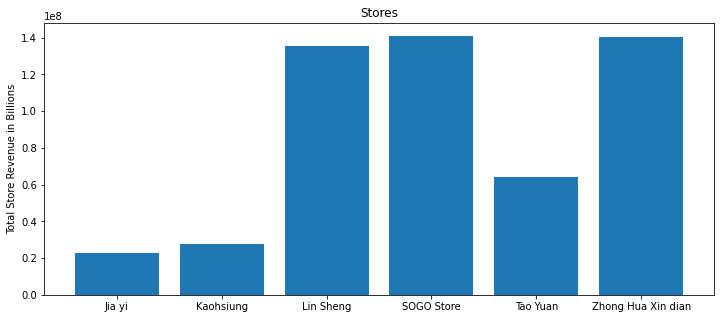

In [6]:
StoreCounts = df.groupby('StoreName')\
    .BoxSpending.sum()\
    .reset_index()\
    .sort_values(by='StoreName')

plt.figure(figsize=(12, 5))
plt.title('Stores')
plt.ylabel('Total Store Revenue in Billions')
plt.xticks(range(len(StoreCounts.StoreName)), StoreCounts.StoreName.values)
plt.bar(range(len(StoreCounts)), StoreCounts.BoxSpending.values)

<BarContainer object of 5 artists>

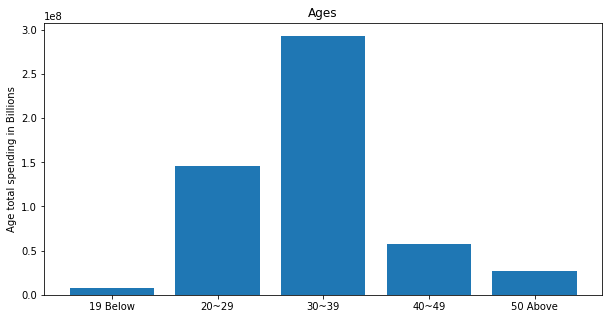

In [7]:
Ages = df.groupby('Age')\
    .BoxSpending.sum()\
    .reset_index()\
    .sort_values(by='Age')

plt.figure(figsize=(10, 5))
plt.title('Ages')
plt.ylabel('Age total spending in Billions')
plt.xticks(range(len(Ages.Age)), Ages.Age.values)
plt.bar(range(len(Ages)), Ages.BoxSpending.values)

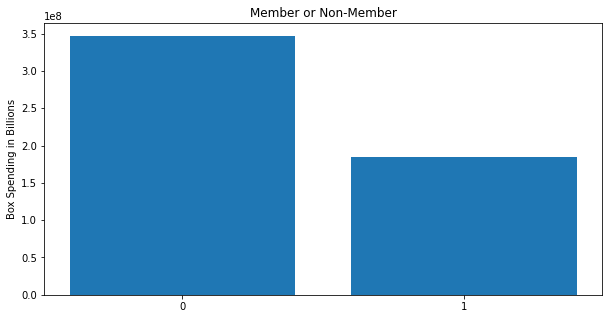

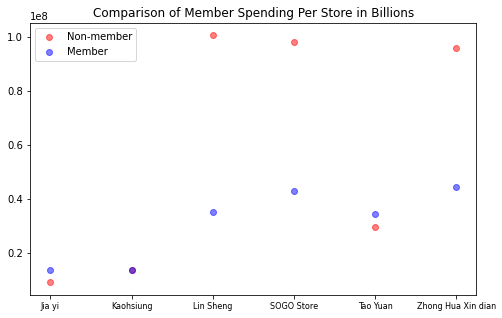

In [8]:
Member = df.groupby('Membership')\
    .BoxSpending.sum().reset_index()\
    .sort_values(by='Membership')

plt.figure(figsize=(10, 5))
plt.title('Member or Non-Member')
plt.ylabel('Box Spending in Billions')
plt.xticks(range(len(Member.Membership)), Member.Membership.values)
plt.bar(range(len(Member)), Member.BoxSpending.values)


tja = df.groupby(['Membership', 'StoreName'])["BoxSpending"].sum().reset_index()
tja_non = tja.loc[tja['Membership'] == 0]
tja_mem = tja.loc[tja['Membership'] == 1]

x_positions = range(len(tja_non.StoreName.values))
chart_labels = tja_non.StoreName.values
Rev_non = tja_non.BoxSpending.values
Rev_mem = tja_mem.BoxSpending.values

plt.figure(figsize=(8, 5))
plt.title('Comparison of Member Spending Per Store in Billions')
plt.scatter(x=x_positions, y=Rev_non, color='red', alpha=0.5)
plt.scatter(x=x_positions, y=Rev_mem, color='blue', alpha=0.5)
plt.legend(["Non-member", "Member"], loc='upper left')
plt.xticks(x_positions, chart_labels, fontsize=8)
plt.show()


# X(feature) age -> y(label) Boxspending


In [9]:
df.head()

,StoreCode,BillCode,BoxSpending,CustomerNumber,Age,Membership,UniqueID,StoreName
0,107,1602010011,2857,6,30~39,0,1602010011107,SOGO Store
10,107,1602010028,2080,4,20~29,0,1602010028107,SOGO Store
30,107,1602010034,1300,2,30~39,0,1602010034107,SOGO Store
39,107,1602010037,2133,5,20~29,0,1602010037107,SOGO Store
46,107,1602010040,1161,7,20~29,0,1602010040107,SOGO Store


In [10]:
df['Age'].unique() # 有這些類別

array(['30~39', '20~29', '19 Below', '40~49', '50 Above'], dtype=object)

In [11]:
# 先Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Age'] = labelencoder.fit_transform(df['Age'])
df.head()

,StoreCode,BillCode,BoxSpending,CustomerNumber,Age,Membership,UniqueID,StoreName
0,107,1602010011,2857,6,2,0,1602010011107,SOGO Store
10,107,1602010028,2080,4,1,0,1602010028107,SOGO Store
30,107,1602010034,1300,2,2,0,1602010034107,SOGO Store
39,107,1602010037,2133,5,1,0,1602010037107,SOGO Store
46,107,1602010040,1161,7,1,0,1602010040107,SOGO Store


In [12]:
a=df.groupby('Age').BoxSpending.sum()
print(a)
print(a.iloc[2])

Age
0      7768326
1    146184624
2    293078135
3     57657305
4     26435365
Name: BoxSpending, dtype: int64
293078135


In [13]:
b=df.groupby('Age').CustomerNumber.sum()
print(b.iloc[2])

930280


In [14]:
a.iloc[2] / b.iloc[2]

315.04292793567527

In [15]:
df['Age'].unique()

array([2, 1, 0, 3, 4])

In [16]:
# 再one-hot-encode
df = pd.get_dummies(data=df, columns=['Age'])
df.head()

,StoreCode,BillCode,BoxSpending,CustomerNumber,Membership,UniqueID,StoreName,Age_0,Age_1,Age_2,Age_3,Age_4
0,107,1602010011,2857,6,0,1602010011107,SOGO Store,0,0,1,0,0
10,107,1602010028,2080,4,0,1602010028107,SOGO Store,0,1,0,0,0
30,107,1602010034,1300,2,0,1602010034107,SOGO Store,0,0,1,0,0
39,107,1602010037,2133,5,0,1602010037107,SOGO Store,0,1,0,0,0
46,107,1602010040,1161,7,0,1602010040107,SOGO Store,0,1,0,0,0


In [17]:
df.columns

Index(['StoreCode', 'BillCode', 'BoxSpending', 'CustomerNumber', 'Membership',
       'UniqueID', 'StoreName', 'Age_0', 'Age_1', 'Age_2', 'Age_3', 'Age_4'],
      dtype='object')

## # 建置資料集

In [18]:
X = df[['Age_0','Age_1','Age_2','Age_3','Age_4']] # 建置特徵集
y = df['BoxSpending'] # 建置標籤集

In [19]:
print(X.shape)
print(y.shape)

(319776, 5)
(319776,)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 可以發現Age那欄位是一個字串,因此要轉為數字

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression().fit(X_train,y_train)
print("Linear model intercept: {}".format(model.intercept_))
print("Linear model coeff (w): {}".format(model.coef_))

Linear model intercept: -1790210681227106.0
Linear model coeff (w): [1.79021068e+15 1.79021068e+15 1.79021068e+15 1.79021068e+15
 1.79021068e+15]


In [21]:
print("score (training): {}%".format(model.score(X_train,y_train)))
print("score (testing): {}%".format(model.score(X_test,y_test)))

score (training): 0.028159382038093983%
score (testing): 0.028169742791771535%


In [22]:
X_pred=[0,0,1,0,0]
y_pred = model.predict([X_pred])
print("Prediction is {}".format(y_pred))

Prediction is [1898.25]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## 經過特徵縮放後,都是0或是1,沒屁用

In [23]:
from sklearn.preprocessing import MinMaxScaler
X = df[['Age_0','Age_1','Age_2','Age_3','Age_4']] # 建置特徵集
y = df['BoxSpending'] # 建置標籤集
scaler = MinMaxScaler().fit(X) # feature_range(0,1)
X_scaled = scaler.transform(X)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 可以發現Age那欄位是一個字串,因此要轉為數字

X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
model = LinearRegression().fit(X_train_scaled,y_train)
print("Linear model intercept: {}".format(model.intercept_))
print("Linear model coeff (w): {}".format(model.coef_))

Linear model intercept: -1790210681227106.0
Linear model coeff (w): [1.79021068e+15 1.79021068e+15 1.79021068e+15 1.79021068e+15
 1.79021068e+15]


In [25]:
print("score (training): {}%".format(model.score(X_train_scaled,y_train)))
print("score (testing): {}%".format(model.score(X_test_scaled,y_test)))

score (training): 0.028159382038093983%
score (testing): 0.028169742791771535%


In [26]:
X_pred=[0,0,1,0,0]
y_pred = model.predict([X_pred])
print("Prediction is {}".format(y_pred))

Prediction is [1898.25]


## 使用Ridge regression 看看
**Ridge regression (嶺回歸)**  

- 一樣使用到最小平方差和,殘差和  
- 多一項參數用作處罰,又稱作 regularization 標準化:將資料常態分佈,sigma=1,mean=0,  

**避免overfit**,藉由限制模型達成模型簡單化  

- 使用L2標準化,減少權重  
- α參數用來控制標準化:  
    
    α越高,更多標準化,model更簡單  
    
    α越低,越少標準化,model更複雜  

In [27]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=2)
linridge = model.fit(X_train,y_train)

In [28]:
print("Linear model intercept: {}".format(model.intercept_))
print("Linear model coeff (w): {}".format(model.coef_))

Linear model intercept: 1542.0780883271295
Linear model coeff (w): [-665.12539785 -221.95836738  354.16128966  300.66347307  232.25900257]


In [29]:
print("score (training): {}%".format(model.score(X_train,y_train)))
print("score (testing): {}%".format(model.score(X_test,y_test)))

score (training): 0.02816068125083082%
score (testing): 0.02815101318604496%


In [30]:
X_pred=[0,0,1,0,0]
y_pred = model.predict([X_pred])
print("Prediction is {}".format(y_pred))

Prediction is [1896.23937799]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


## **Lasso regression 套索回歸**

- 同樣的α控制標準化程度  
- 也是使用最小平方差  

Lasso 為 Linear Regression 加上 L1，SSE + L1  

Ridge 為 Linear Regression 加上 L2，SSE + L2  

正則化函數是⽤來衡量模型的複雜度，  

避免模型有over-fitting的問題。

In [31]:
from sklearn.linear_model import Lasso

linlasso =Lasso(alpha=4.0,max_iter=10000).fit(X_train,y_train)

print("Lasso regression linear model intercept: {}".format(linlasso.intercept_))
print("Lasso regression linear model coeff: {}".format(linlasso.coef_))
print("Non-zero features: {}".format(np.sum(linlasso.coef_!=0)))
print("R-squared score (training): {:.3f}".format(linlasso.score(X_train,y_train)))
print("R-squared score (test): {:.3f}\n".format(linlasso.score(X_test,y_test)))

Lasso regression linear model intercept: 1774.7178494095663
Lasso regression linear model coeff: [-754.24763581 -443.06824594  113.21704195   27.42672603   -0.        ]
Non-zero features: 4
R-squared score (training): 0.028
R-squared score (test): 0.028

